# Preprocessing files 


In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from python_speech_features import mfcc
import matplotlib.pyplot as plt

#

## Find files, and list structure

In [5]:

# OS walk through the directory to find the files
root_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/Msc2022_BCM_AkselStark'
data = [] # Empty list to store all hdf5 files in the directory

for subdir, dirs, files in sorted(os.walk(root_dir)):
    for file in files:
        if "hdf5" in file:
            # Load the hdf5 file, and append to the list
            data.append(h5py.File(os.path.join(subdir, file), 'r'))
            
            print(f'{subdir}/{file}') # Print the filename
            keylist = list(data[0].keys())
            print( keylist) # Print the keys of the hdf5 file
            for i,j in enumerate(data):
                print(f'Index of the hdf5 file: {i}') # Print the index of the hdf5 file
                for key in keylist:
                    print(key)
                    try: # Try to print the keys. If it fails, print the data
                        print(f"    {list(data[i][key].keys())}")
                    except:
                        print("    No subkeys")
                        print(f"    {np.array(data[i][key])}")
                        s = data[i][key]
            

//uni.au.dk/dfs/Tech_EarEEG/Students/Msc2022_BCM_AkselStark\data/sourcedata_subj-01.hdf5
['DAQ970A', 'gTec', 'streaminfo']
Index of the hdf5 file: 0
DAQ970A
    ['data', 'labels']
gTec
    ['data', 'labels']
streaminfo
    No subkeys
    [(8, b'cf_float32', 8649.913, b'5125-240-003', b'gTec',  1200, b'gTecUSBamp_UB-2015.01-11', b'Mixed')
 (3, b'cf_float32', 8651.712, b'5125-240-003', b'DAQ970A', 50000, b'DAQ970A::TCPIP::192.168.56.100', b'Generic')]


## Load data, and calculate cepstrum

In [6]:
data_bcm = np.array(data[0]['DAQ970A']['data'])

pass

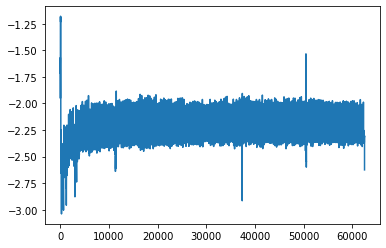

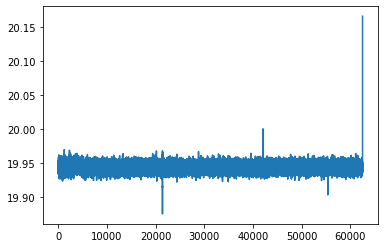

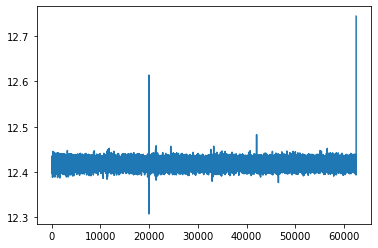

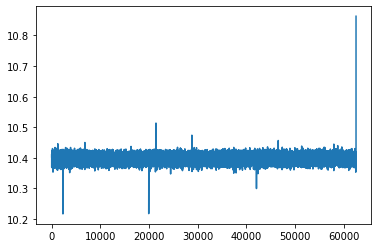

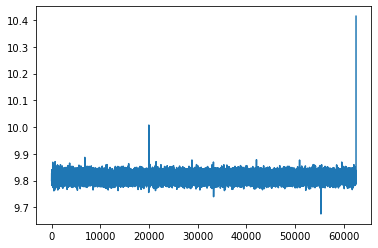

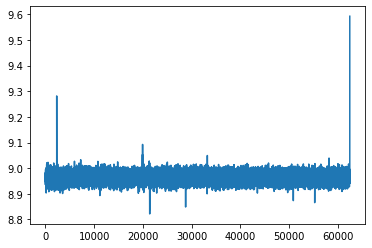

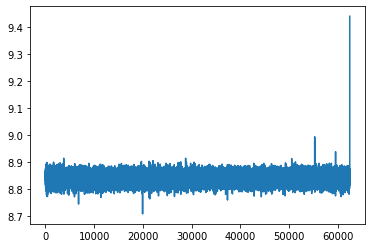

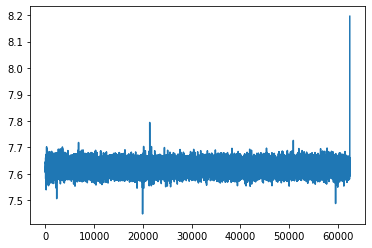

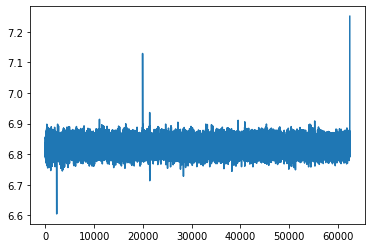

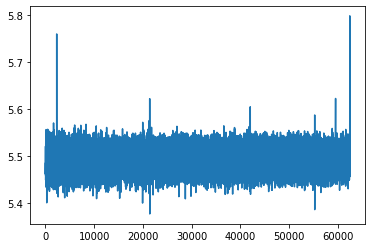

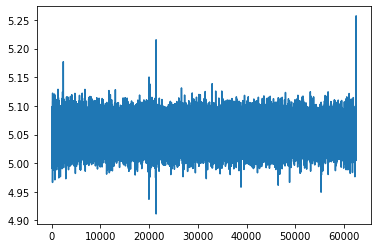

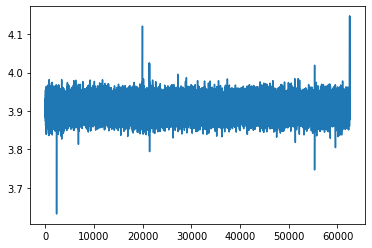

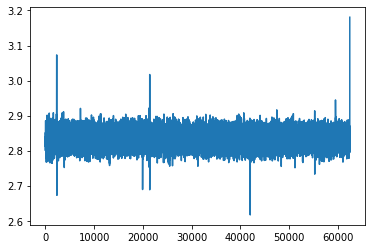

In [16]:
mfcc_test = mfcc(data_bcm[0:10000000,0])

# Plot the MFCC
for i in range(0,13):
    plt.plot(mfcc_test[1:,i])
    plt.show()